In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carregando Dados

df = pd.read_excel("dados.xlsx", sheet_name="Dados_Publico")
df.head()

,ID,Campeonato,Adversario,Hora_dia,Dia_Semana,Estadio,Publico,Renda_Bruta,Renda_Liquida,Resultado,Data
0,1,Campeonato Mineiro,URT,Tarde,Quarta,Independência,7413.0,154894.0,4997.60,VITORIA,2022-01-26
1,2,Campeonato Mineiro,América-MG,Noite,Quarta,Mineirão,18835.0,484652.5,9691.56,DERROTA,2022-02-02
2,3,Campeonato Mineiro,Democrata,Noite,Quarta,Mineirão,12311.0,245620.0,29886.31,VITORIA,2022-02-09
3,4,Campeonato Mineiro,Uberlândia,Noite,Quinta,Independência,9039.0,215380.0,49107.41,VITORIA,2022-02-17
4,5,Campeonato Mineiro,Vila Nova MG,Manhã,Domingo,Independência,19616.0,507168.0,239122.80,EMPATE,2022-02-20


<function matplotlib.pyplot.show(close=None, block=None)>

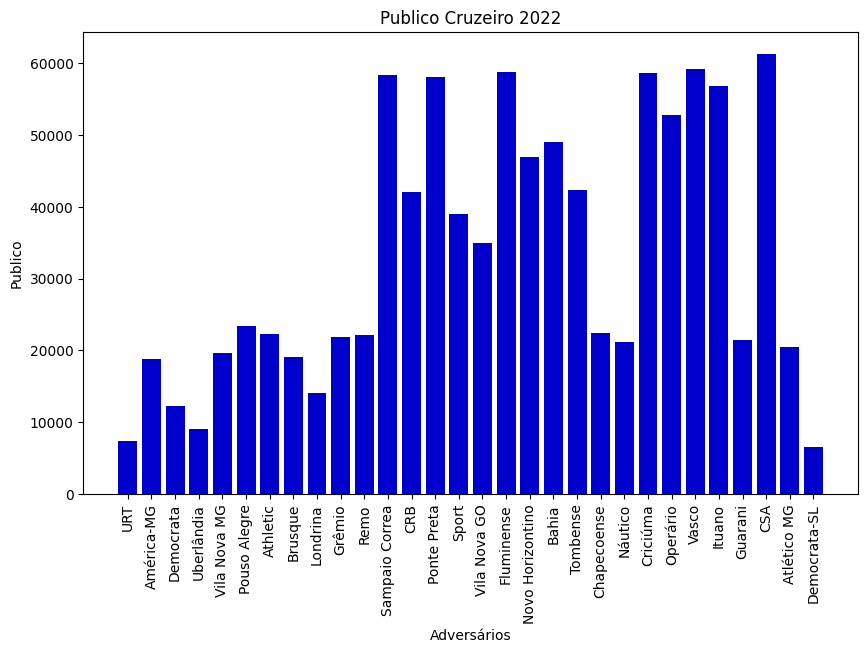

In [5]:
#Analise Grafica DF Principal Adversario x Publico

df_adv_pub = df.iloc[:,[2,6]]
df_adv_pub
x = df_adv_pub.iloc[:, 0]
y = df_adv_pub.iloc[:, 1]

#Gerando Gráfico
n = len(x)
plt.figure(figsize=(10,6))
plt.title("Publico Cruzeiro 2022")
plt.xlabel("Adversários")
plt.ylabel("Publico")
plt.xticks(rotation=90)
plt.bar(x, y, width=0.8, color="#0000CD")
plt.show

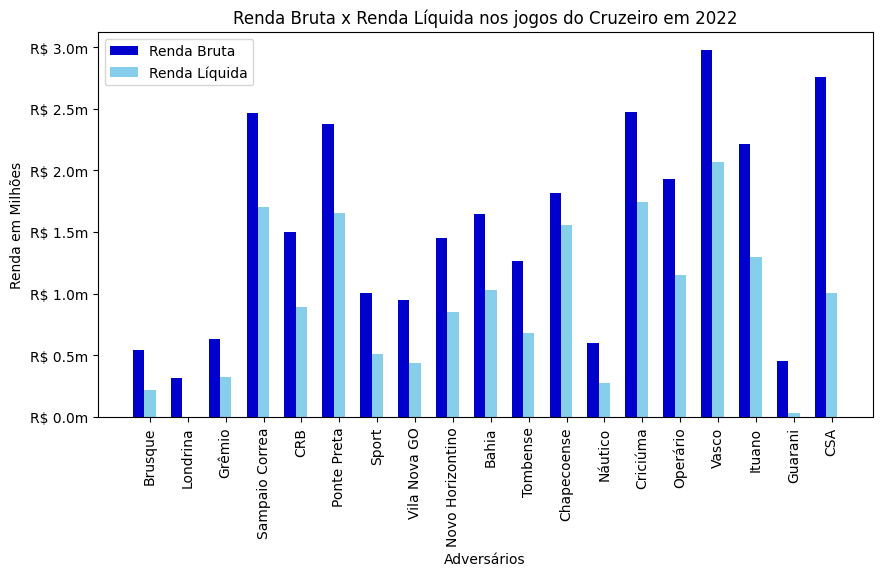

In [7]:
#Analise Grafica DF Principal Adversario x Renda Bruta/Liquida
from matplotlib.ticker import FuncFormatter
def milhoes(r1, pos):
    return f'R$ {r1*1e-6}m'

formato = FuncFormatter(milhoes)

df_serieb = df.loc[(df["Campeonato"] == "Brasileiro Série B")]
df_renda = df_serieb.iloc[:, [2,7,8]]
adv = df_renda.iloc[:, 0]
renda_bruta = df_renda.iloc[:, 1]
renda_liquida = df_renda.iloc[:, 2]


#Construção Do Gráfico

barWidht = 0.30

r1 = np.arange(len(renda_bruta))
r2 = [x + barWidht for x in r1]

fig,ax = plt.subplots()
ax.yaxis.set_major_formatter(formato)
fig.set_size_inches(10,5)
plt.bar(r1, renda_bruta, width=barWidht, color="#0000CD", label="Renda Bruta")
plt.bar(r2, renda_liquida, width=barWidht, color="#87CEEB", label="Renda Líquida")

plt.xlabel("Adversários")
plt.xticks([r + barWidht for r in range(len(renda_bruta))], adv, rotation=90)
plt.ylabel("Renda em Milhões")
plt.title("Renda Bruta x Renda Líquida nos jogos do Cruzeiro em 2022")

plt.legend()
plt.show()

In [8]:
from matplotlib.ticker import FuncFormatter
def milhoes(rb, pos):
    return f'R$ {rb*1e-6}m'

formato = FuncFormatter(milhoes)

<Figure size 1000x500 with 0 Axes>

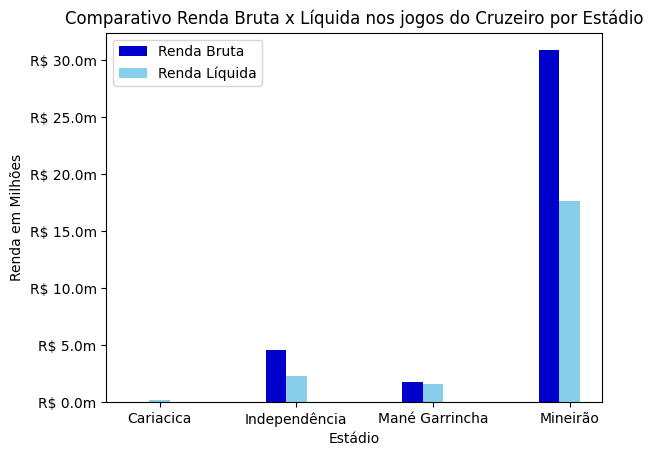

In [9]:
#Gráfico Comparativo de Renda Bruta x Líquida por Estádio

df_estadios = df.groupby("Estadio").sum().reset_index()
df_estadios = df_estadios[["Estadio", "Renda_Bruta", "Renda_Liquida"]]

est = df_estadios.iloc[:, 0]
rendab = df_estadios.iloc[:, 1]
rendal = df_estadios.iloc[:, 2]

barWidht = 0.15
plt.figure(figsize=(10,5))

rb = np.arange(len(rendab))
rl = [x + barWidht for x in rb]

fig,ax = plt.subplots()
ax.yaxis.set_major_formatter(formato)
plt.bar(rb, rendab, width=barWidht, color="#0000CD", label="Renda Bruta")
plt.bar(rl, rendal, width=barWidht, color="#87CEEB", label="Renda Líquida")

plt.xlabel("Estádio")
plt.xticks([r + barWidht for r in range(len(rendab))], est)
plt.ylabel("Renda em Milhões")
plt.title("Comparativo Renda Bruta x Líquida nos jogos do Cruzeiro por Estádio")

plt.legend()
plt.show()


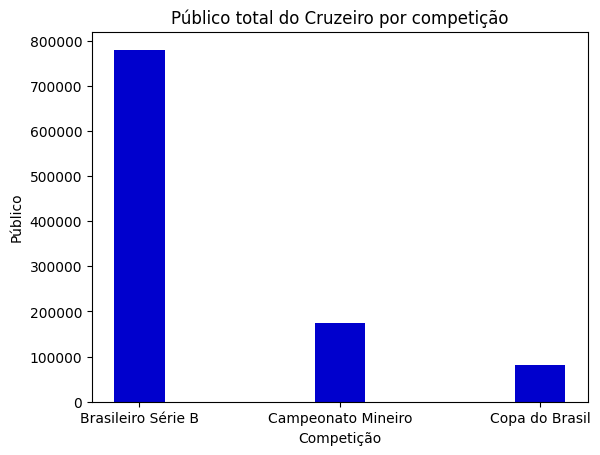

In [10]:
#Alguns Dados Interessantes

df_publicototal = df.groupby("Campeonato").sum().reset_index()
df_publicototal = df_publicototal.drop(columns="ID")

camp = df_publicototal.iloc[:, 0]
pub = df_publicototal.iloc[:, 1]

plt.bar(camp, pub, width=0.25, color="#0000CD")
plt.xlabel("Competição")
plt.ylabel("Público")
plt.title("Público total do Cruzeiro por competição")
plt.show()

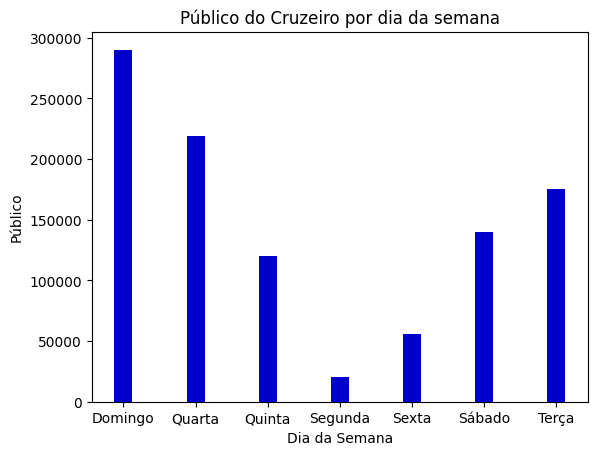

In [11]:
#Publico por Dia da Semana

df_dia = df.groupby("Dia_Semana").sum().reset_index()
df_dia = df_dia.drop(columns="ID")

dia = df_dia.iloc[:, 0]
p = df_dia.iloc[:, 1]

plt.bar(dia, p, width=0.25, color="#0000CD")
plt.xlabel("Dia da Semana")
plt.ylabel("Público")
plt.title("Público do Cruzeiro por dia da semana")
plt.show()

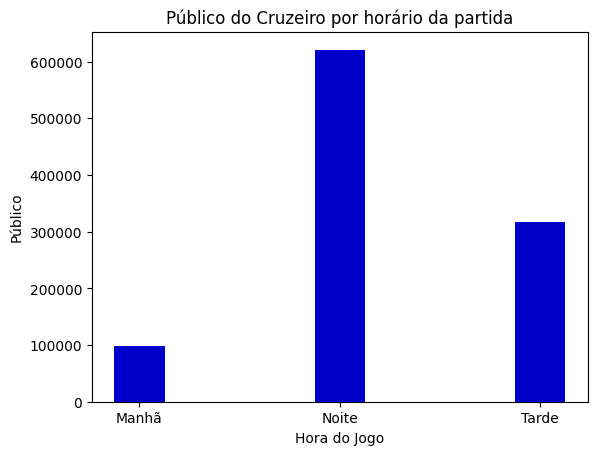

In [12]:
#Público por hora do jogo

df_hora = df.groupby("Hora_dia").sum().reset_index()
df_hora = df_hora.drop(columns="ID")

hora = df_hora.iloc[:, 0]
p = df_hora.iloc[:, 1]

plt.bar(hora, p, width=0.25, color="#0000CD")
plt.xlabel("Hora do Jogo")
plt.ylabel("Público")
plt.title("Público do Cruzeiro por horário da partida")
plt.show()